In [1]:
import os
import numpy as np
import scipy.sparse
import scipy.io
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import numpy as np
import scanpy as sc
import pandas as pd

In [2]:
dataset = 'Immune_Human' # Lung, Immune_Human, Human_Retina, Pancreas
dir_path = "/home/ajita/Documents/data_integration/scDREAMER/data/"
emb_folder = "/home/ajita/Documents/data_integration/scDREAMER_pyTorch/output/"

In [3]:

def load_data(dataset,batch):
    
    if (dataset == "Human_Mouse"):
        dataset = "hum_mou"
        
    adata = sc.read_h5ad(dir_path + dataset + '.h5ad')
    sc.pp.filter_genes(adata, min_counts=3)
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.raw = adata
    sc.pp.highly_variable_genes(
            adata,
            flavor = "seurat",
            n_top_genes = 2000,
            layer = "counts",
            batch_key = batch,
            subset = True
    )
    return adata

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    } 

our_method_emb_dic = {
                "Pancreas" : "Pancreas/Pancreas_latent_matrix",
                 "Immune_Human" : "Immune_Human/Immune_Human_latent_matrix_correctedkl_0.1dis",
                 'Lung' : 'Lung/Lung_latent_matrix_dis50',
                 'Human_Retina': "Human_Retina/Human_Retina_latent_matrix" ,
                'Human_Mouse' : "Human_Mouse/Human_Mouse_latent_matrix"
                } 


In [4]:

embeddings = our_method_emb_dic[dataset]+'.csv'

batch = batch_key_dic[dataset]
cell_type = cell_type_key_dic[dataset]

adata = load_data(dataset,batch)
emb_path = emb_folder + embeddings 

final_embedings=pd.read_csv(emb_path, sep=',',header=None).values
adata.obsm['final_embeddings'] = final_embedings


Clustering...
use rep: final_embeddings
0.0001 1
0.0790421052631579 7
0.15798421052631578 10
0.23692631578947368 10
0.3158684210526316 12
0.3948105263157895 14
0.47375263157894737 14
0.5526947368421052 14
0.6316368421052632 16
0.7105789473684211 17
0.789521052631579 18
0.8684631578947368 19
0.9474052631578948 19
1.0263473684210527 19
1.1052894736842105 21
1.1842315789473685 21
1.2631736842105263 22
1.3421157894736842 22
1.4210578947368422 23
1.5 26


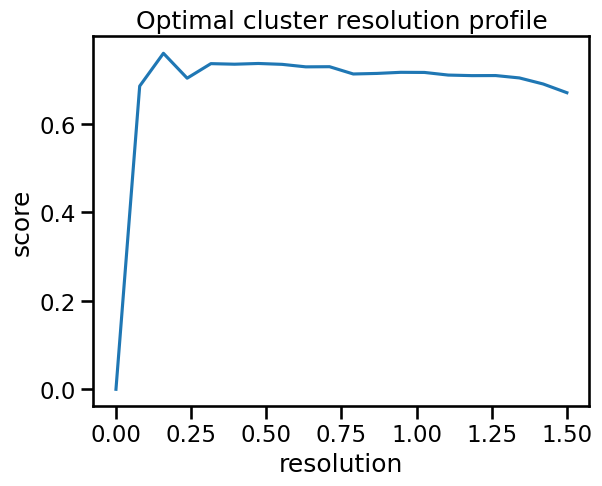

NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
use rep: final_embeddings
0.0001 1
0.0790421052631579 7
0.15798421052631578 10
0.23692631578947368 10
0.3158684210526316 12
0.3948105263157895 14
0.47375263157894737 14
0.5526947368421052 14
0.6316368421052632 16
0.7105789473684211 17
0.789521052631579 18
0.8684631578947368 19
0.9474052631578948 19
1.0263473684210527 19
1.1052894736842105 21
1.1842315789473685 21
1.2631736842105263 22
1.3421157894736842 22
1.4210578947368422 23
1.5 26
use rep: final_embeddings
0.0001 1
0.0790421052631579 7
0.15798421052631578 10
0.23692631578947368 10
0.3158684210526316 12
0.3948105263157895 14
0.47375263157894737 14
0.5526947368421052 14
0.6316368421052632 16
0.7105789473684211 17
0.789521052631579 18
0.8684631578947368 19
0.9474052631578948 19
1.0263473684210527 19
1.1052894736842105 21
1.1842315789473685 21
1.2631736842105263 22
1.3421157894736842 22
1.4210578947368422 23
1.5 26
use rep: final_embeddings
0.0001 1
0.079042105263

In [5]:
import scIB
results,ilisi_all,clisi_all,kbet_all  =   scIB.metrics.metrics(                
                adata,
                adata,
                batch_key = batch, #need to change according
                label_key = cell_type, #need to change according
                hvg_score_=False,
                cluster_key='cluster',
                cluster_nmi=None,
                ari_=True,
                nmi_=True,
                nmi_method='arithmetic',
                nmi_dir=None,
                silhouette_=True, #
                embed= 'final_embeddings', #need to change according 
                si_metric='euclidean',
                pcr_=True,
                cell_cycle_=False,
                organism='mouse',
                isolated_labels_=True,  # backwards compatibility # isolated scores False for human mouse
                isolated_labels_f1_=True,
                isolated_labels_asw_=True,
                n_isolated=None,
                graph_conn_=True, #
                kBET_=True,#True,#
                kBET_sub=0.5,
                lisi_graph_=True,#
                lisi_raw=True,#
                trajectory_=False,
                type_=None,
                verbose=False,
        )

In [6]:
results

0
NMI_cluster/label          0.760198
ARI_cluster/label          0.717208
ASW_label                  0.570025
ASW_label/batch            0.873748
PCR_batch                  0.786000
cell_cycle_conservation         NaN
isolated_label_F1          0.594543
isolated_label_silhouette  0.522444
graph_conn                 0.954757
kBET                       0.456071
iLISI                      0.337587
cLISI                      0.991007
hvg_overlap                     NaN
trajectory                      NaN

In [7]:
ilisi_all

batch
0      2.278941
1      5.491104
2      4.718329
3      1.901133
4      1.919673
...         ...
16741  3.302375
16742  2.326283
16743  4.337843
16744  4.584979
16745  4.847716

[16746 rows x 1 columns]

In [8]:
kbet_all

0     [0.53, 0.56, 0.55, 0.59, 0.56, 0.48, 0.57, 0.4...
1     [0.36388384754990927, 0.36388384754990927, 0.3...
2     [0.4283513097072419, 0.38366718027734975, 0.45...
3     [0.8836363636363637, 0.8981818181818182, 0.865...
4     [0.3958333333333333, 0.4375, 0.395833333333333...
5     [0.8493150684931506, 0.8538812785388128, 0.835...
6     [0.7748344370860927, 0.7880794701986755, 0.741...
7     [0.2, 0.36, 0.28, 0.52, 0.16, 0.52, 0.24, 0.4,...
8     [0.20454545454545456, 0.2727272727272727, 0.22...
9     [0.5581395348837209, 0.627906976744186, 0.5116...
10    [0.3854166666666667, 0.4444444444444444, 0.368...
11    [0.8431372549019608, 0.803921568627451, 0.8529...
12    [0.2, 0.24, 0.28, 0.12, 0.2, 0.2, 0.16, 0.2, 0...
13    [0.7446808510638298, 0.7446808510638298, 0.744...
14    [0.4074074074074074, 0.5555555555555556, 0.333...
15    [0.6304347826086957, 0.6347826086956522, 0.673...
Name: kBET_all, dtype: object

In [9]:
import numpy as np
path_to_save = "/home/ajita/Documents/data_integration/scDREAMER/scDREAMER/metrics/"
np.savetxt(path_to_save+dataset+"_ilisi.csv", ilisi_all, delimiter=",")
np.savetxt(path_to_save+dataset+"_clisi.csv", clisi_all, delimiter=",")
np.savetxt(path_to_save+dataset+"_kbet_all.csv",np.concatenate([np.array(val).reshape(1,-1) for val in kbet_all],axis = 0), delimiter=',')

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi


latent_matrix = adata.obsm['final_embeddings'] 
labels = np.array(adata.obs[cell_type])
K = np.size(np.unique(labels))
kmeans = KMeans(n_clusters=K, random_state=0).fit(latent_matrix)
y_pred = kmeans.labels_

print('Computing NMI ...')
NMI = nmi(labels.flatten(), y_pred.flatten())
print('NMI = {}'.format(NMI))

Computing NMI ...
NMI = 0.6753374353143924


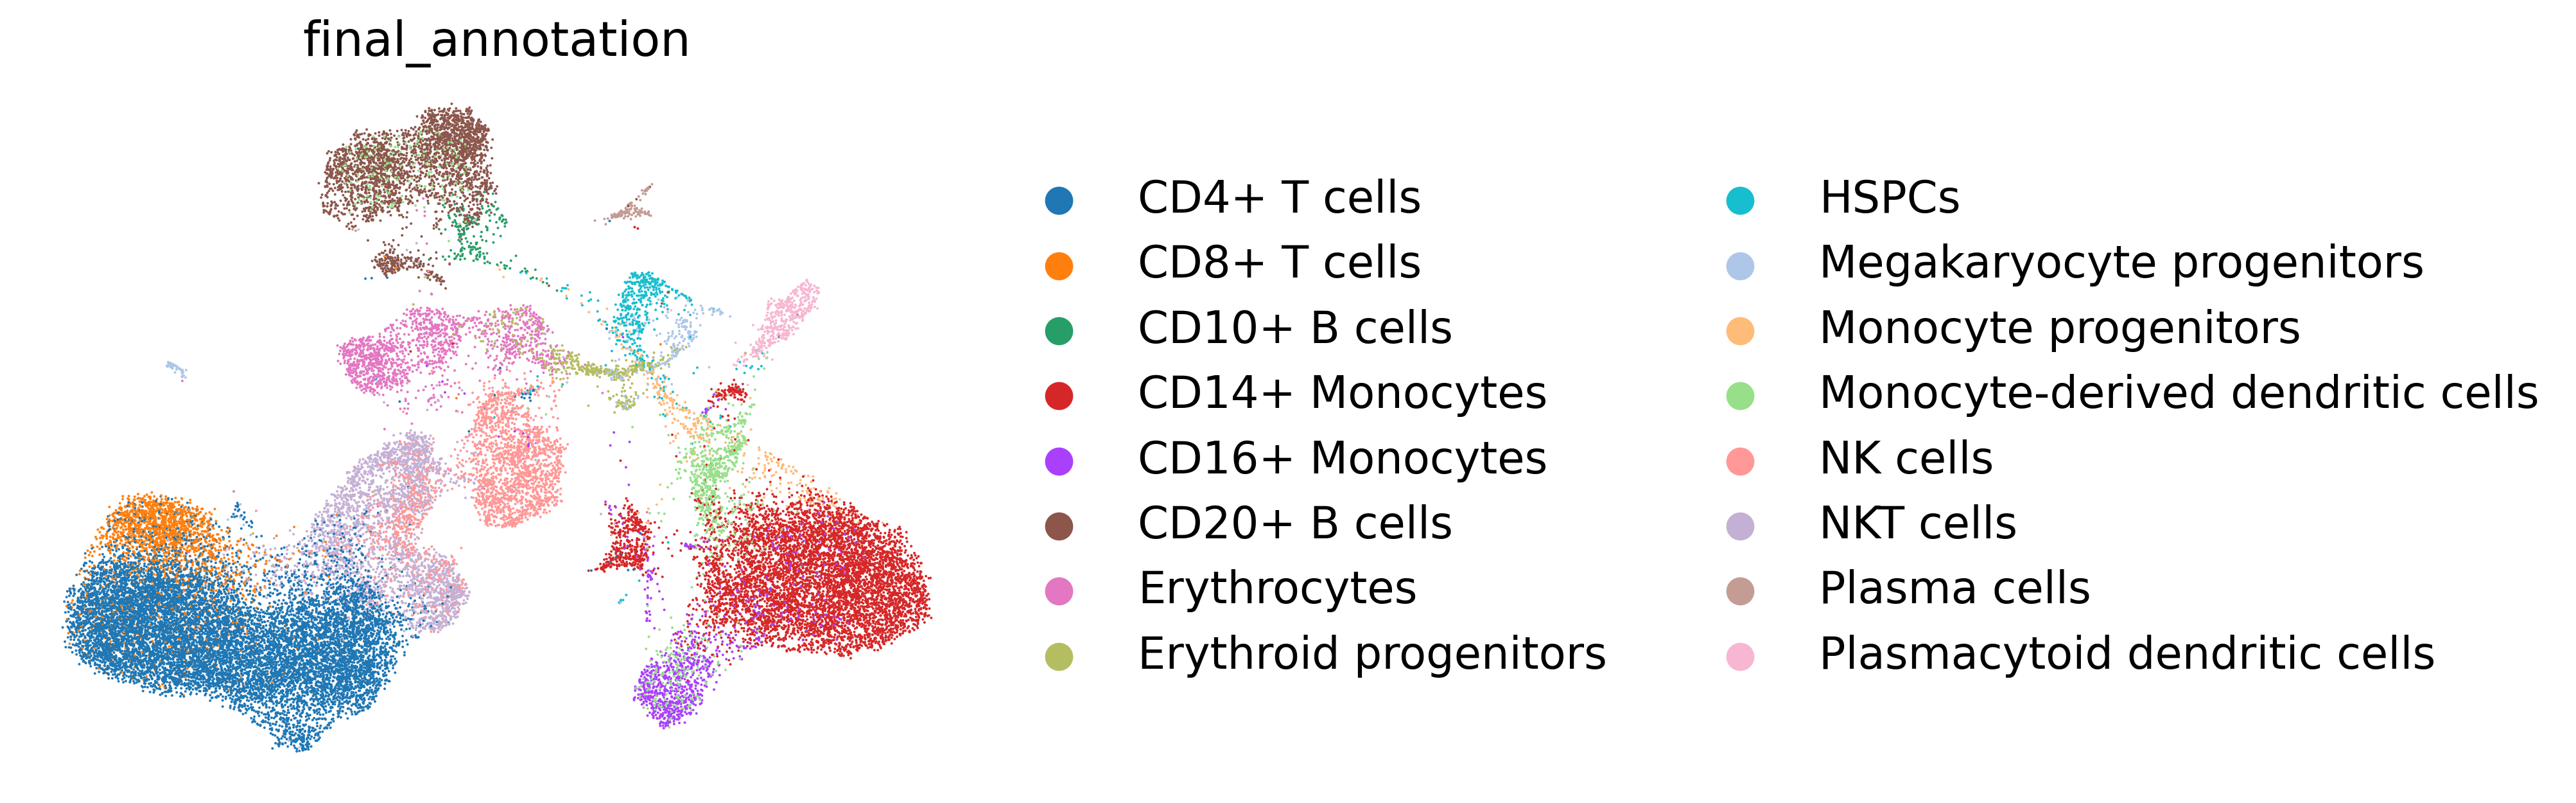

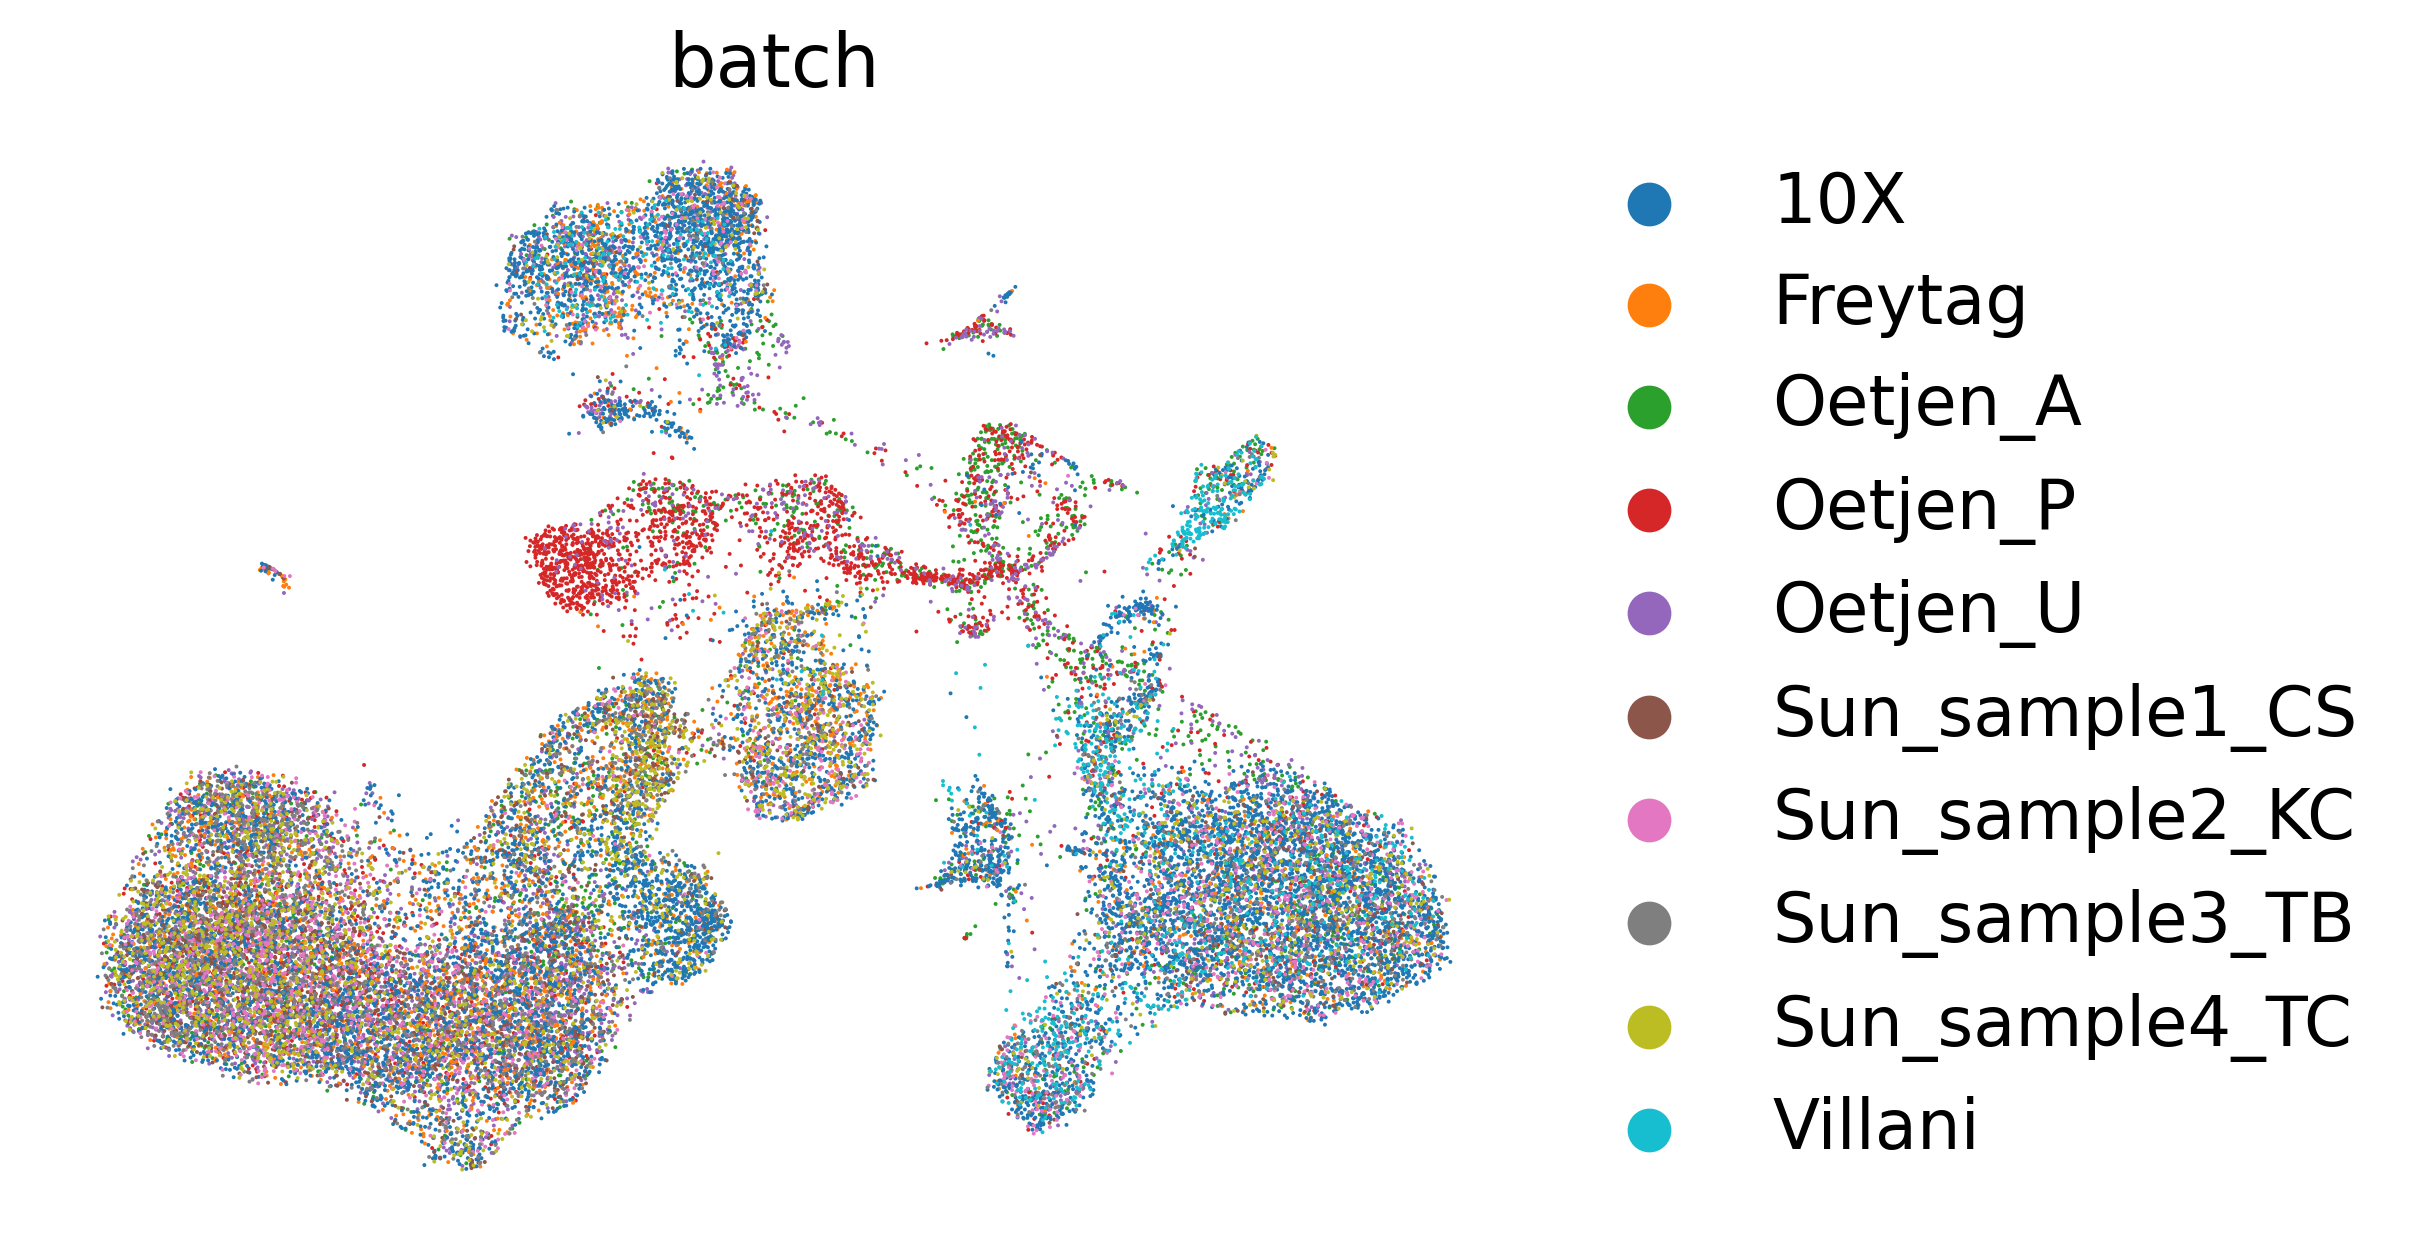

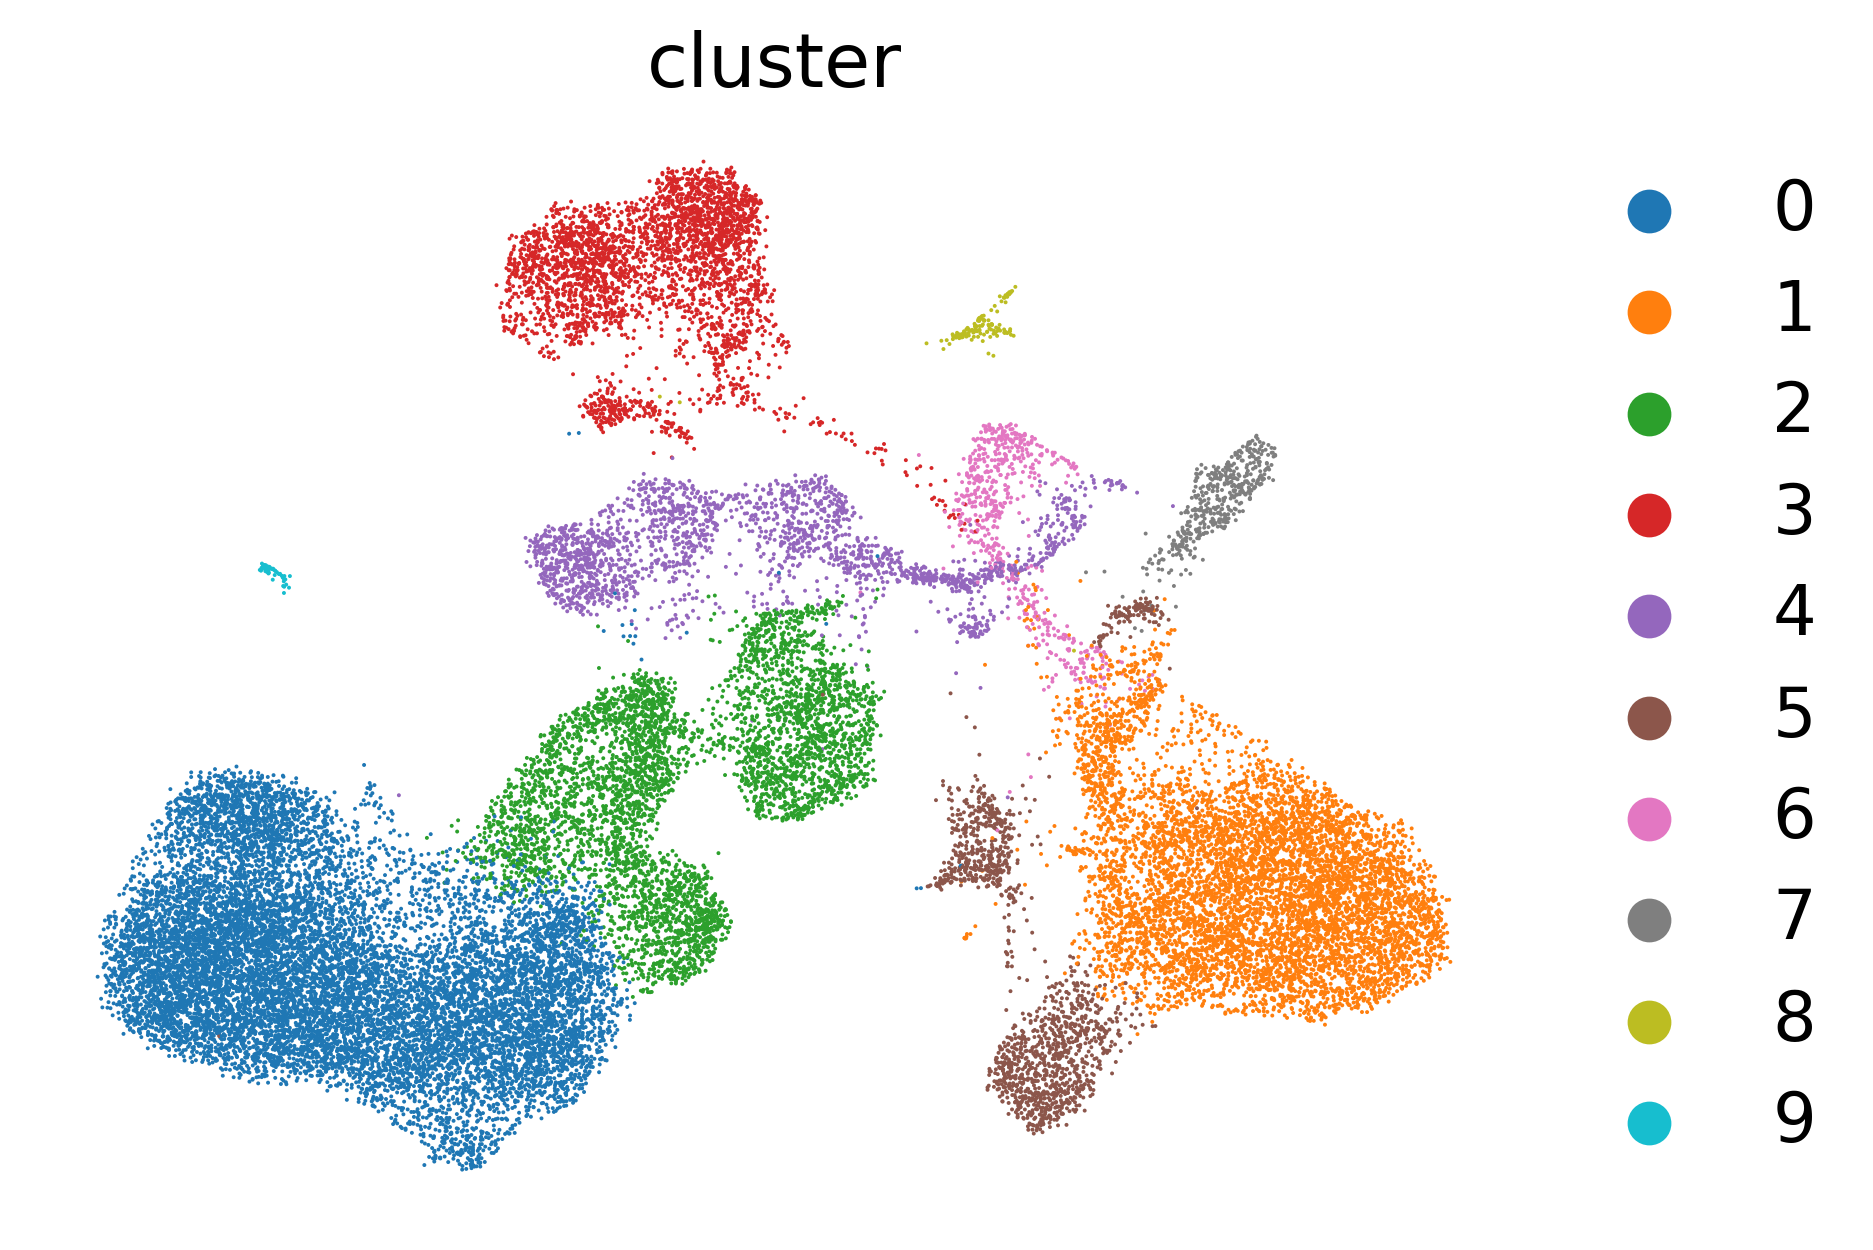

In [12]:
sc.pp.neighbors(adata, use_rep='final_embeddings')  # use_rep = 'final_embeddings'
sc.tl.umap(adata)
sc.pl.umap(adata, color=cell_type, frameon=False)
sc.pl.umap(adata, color=batch, frameon=False)
sc.pl.umap(adata, color='cluster', frameon=False)

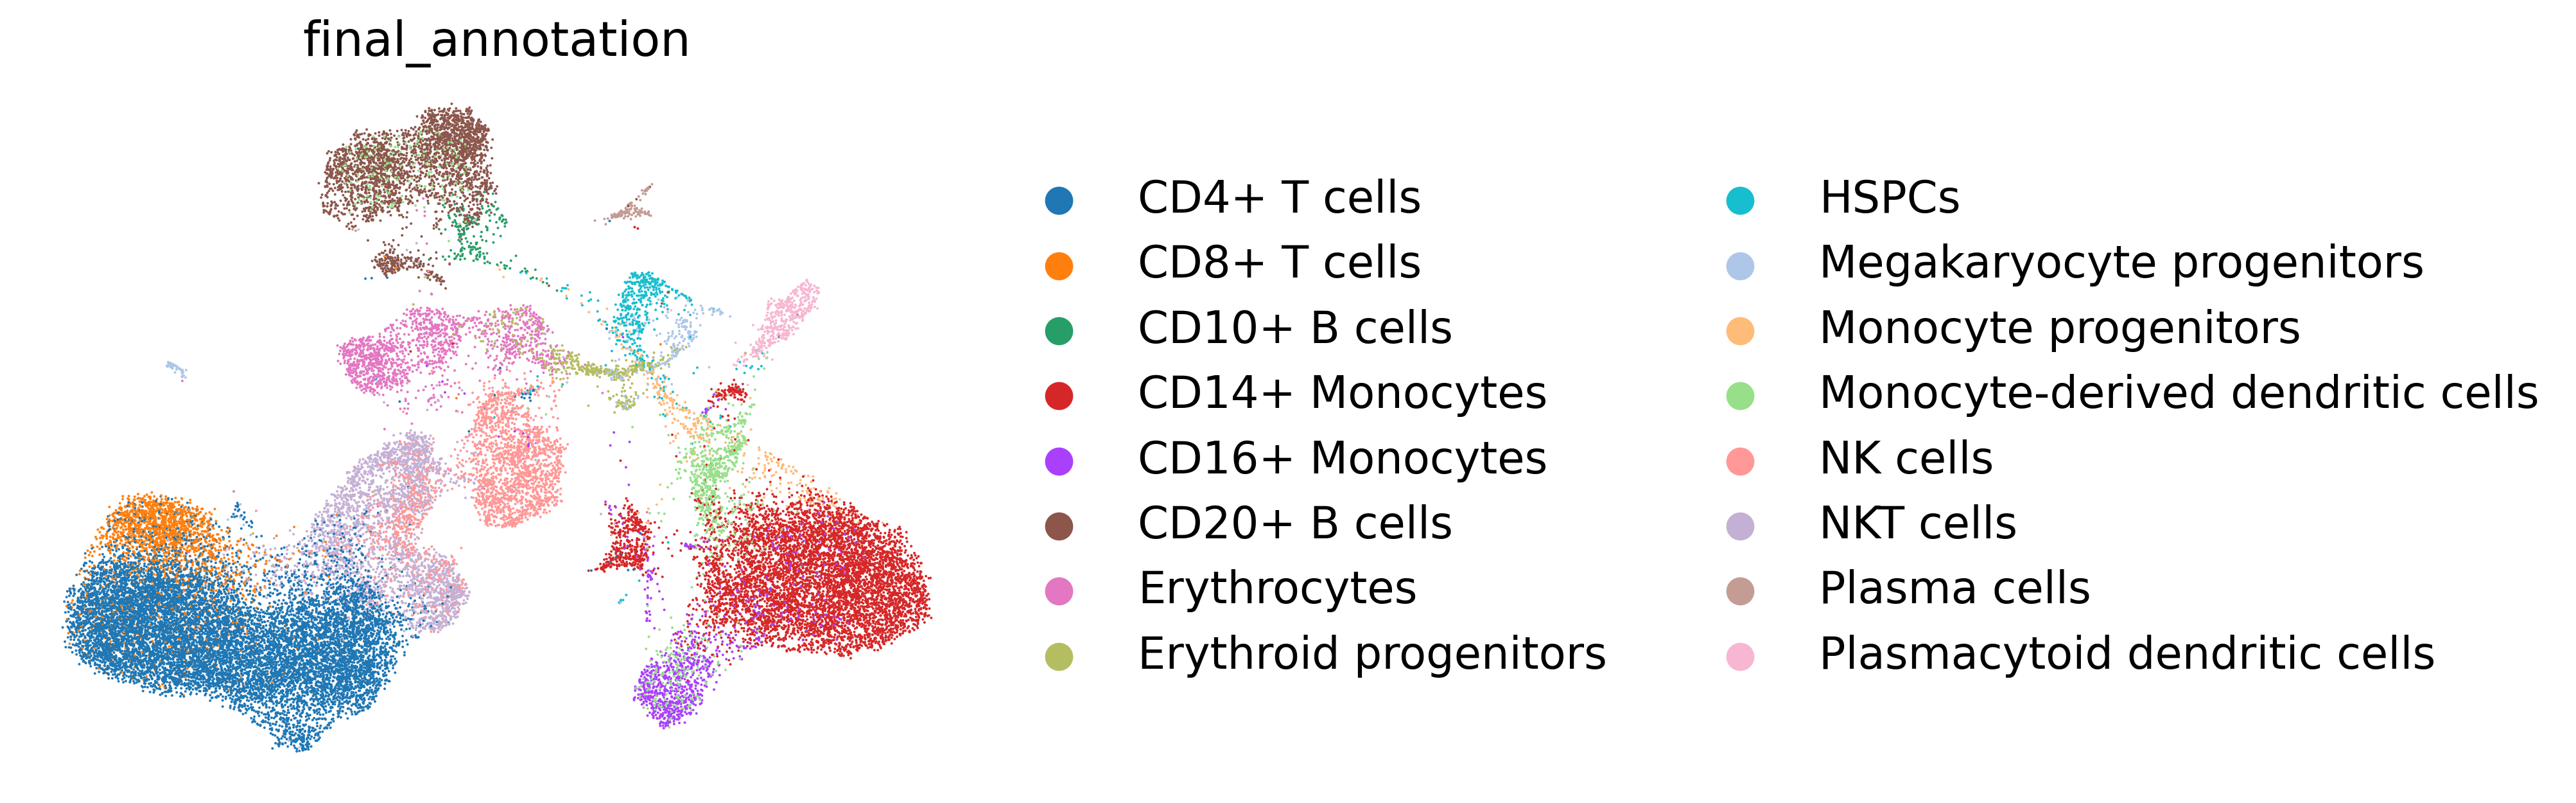

In [13]:
img = sc.pl.umap(adata, color=cell_type, frameon=False)

In [14]:
img

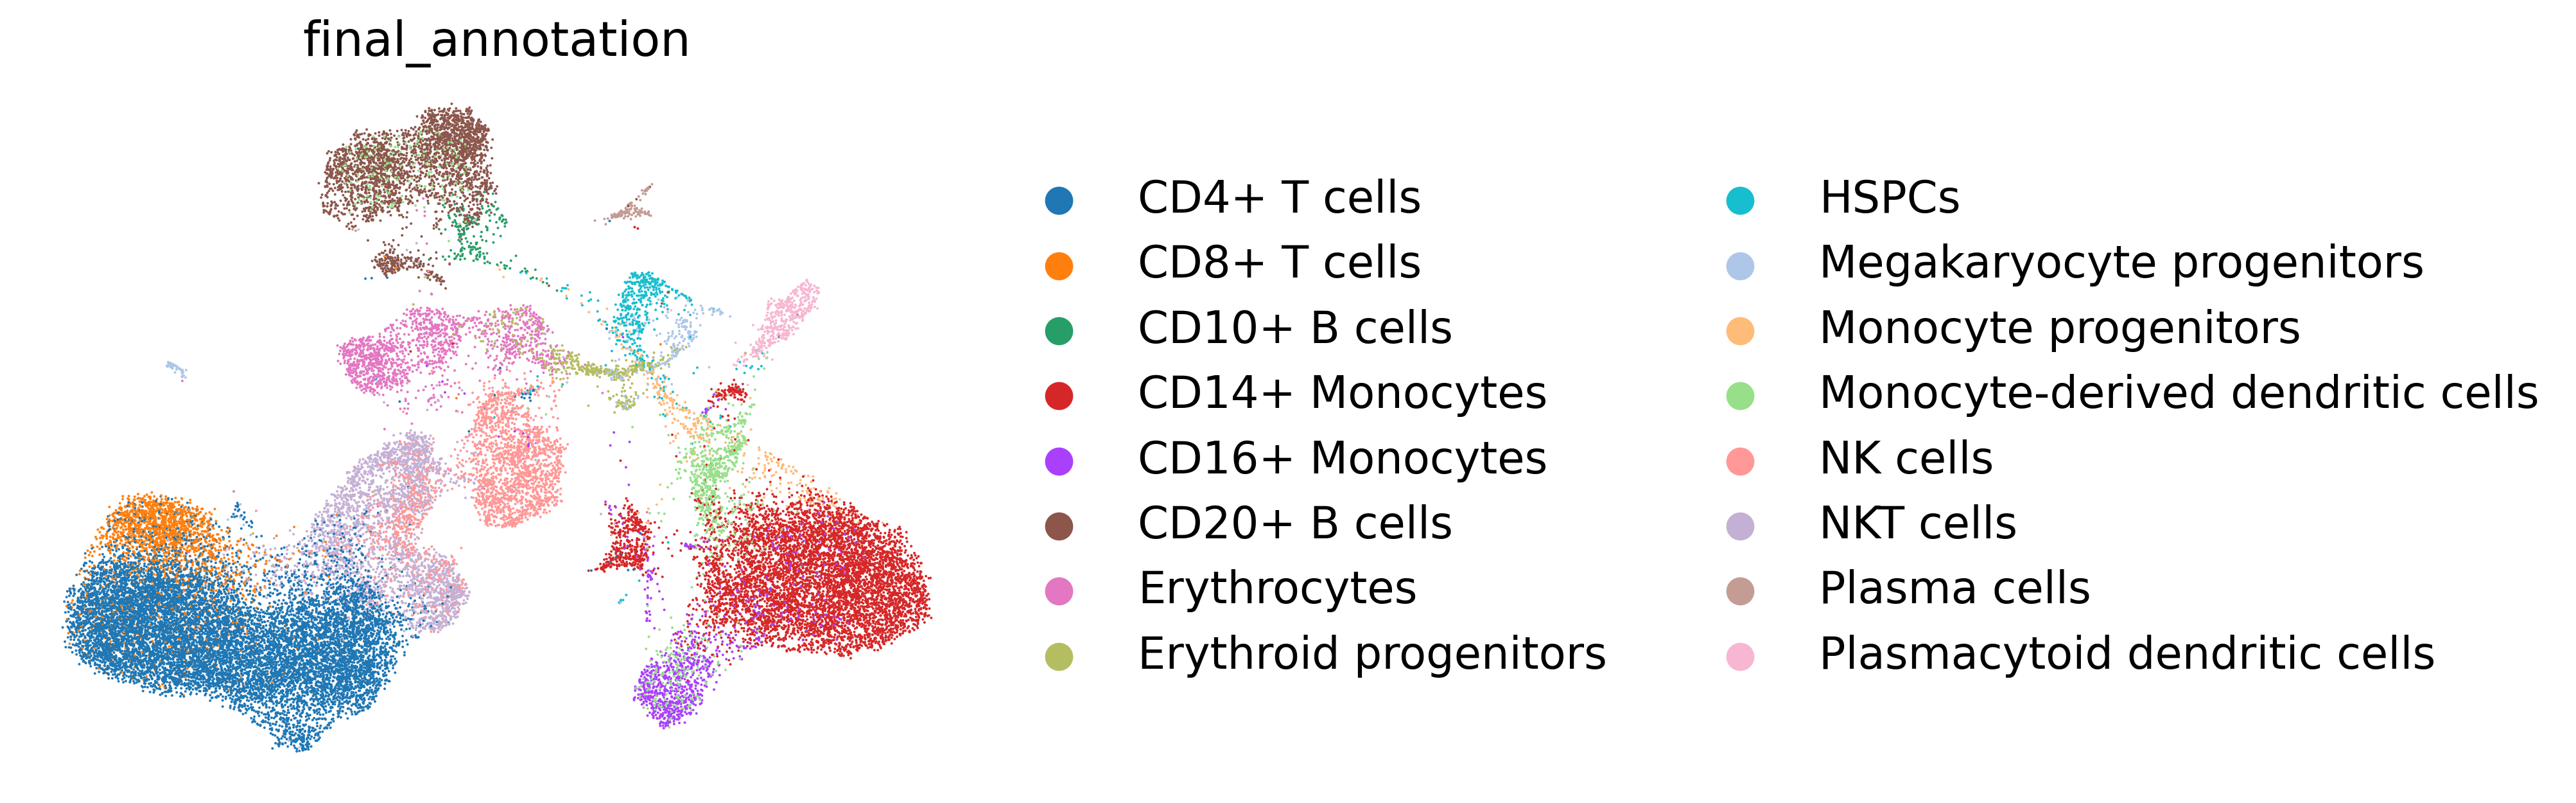

AttributeError: 'NoneType' object has no attribute 'savefig'

In [15]:
sc.pl.umap(adata, color=cell_type, frameon=False).savefig('foo.png', bbox_inches='tight')

In [ ]:
"""
Lung	scDREAMER-woDis	0.662155	0.499891	0.540511	0.874639	0.756987	0.248491	0.526552	0.646457	0.576346	0.260227	0.948805			250 epcohs	nan at 300					
"""